In [4]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# list(Path('/Resources/').iterdir())

Data Cleaning
In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

whale_returns.csv: Contains returns of some famous "whale" investors' portfolios.

algo_returns.csv: Contains returns from the in-house trading algorithms from Harold's company.

sp500_history.csv: Contains historical closing prices of the S&P 500 Index.

In [5]:
# Reading whale returns

whale_data = Path("Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_data, index_col='Date',parse_dates=True, infer_datetime_format=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [6]:
whale_df.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [7]:
whale_df.isnull()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,True,True,True,True
2015-03-03,False,False,False,False
2015-03-04,False,False,False,False
2015-03-05,False,False,False,False
2015-03-06,False,False,False,False
...,...,...,...,...
2019-04-25,False,False,False,False
2019-04-26,False,False,False,False
2019-04-29,False,False,False,False


In [8]:
#count nulls

whale_df.isnull().count()


SOROS FUND MANAGEMENT LLC      1060
PAULSON & CO.INC.              1060
TIGER GLOBAL MANAGEMENT LLC    1060
BERKSHIRE HATHAWAY INC         1060
dtype: int64

In [9]:
#drop nulls

whale_df.dropna().copy()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


Algorythmic Returns 
Read the algorithmic daily returns and clean the data

In [10]:
algo_data = Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_data, index_col='Date',parse_dates=True, infer_datetime_format=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [11]:
algo_df.dtypes

Algo 1    float64
Algo 2    float64
dtype: object

In [12]:
#id nulls
algo_df.isnull()

,Algo 1,Algo 2
Date,,
2014-05-28,False,True
2014-05-29,False,True
2014-05-30,False,True
2014-06-02,False,True
2014-06-03,False,True
...,...,...
2019-04-25,False,False
2019-04-26,False,False
2019-04-29,False,False


Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [13]:
#count nulls
algo_df.isnull().count()

Algo 1    1241
Algo 2    1241
dtype: int64

In [14]:
#drop nulls
algo_df.dropna().copy()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


S&P 500 Returns
Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data.

In [15]:
# Reading S&P 500 Closing Prices
SP500_data = Path("Resources/sp500_history.csv")
SP500_df = pd.read_csv(SP500_data, index_col='Date',parse_dates=True, infer_datetime_format=True)
SP500_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [16]:
# Check Data Types
SP500_df.dtypes

Close    object
dtype: object

In [17]:
# Fix Data Types
SP500_df["Close"] = SP500_df["Close"].str.replace("$","",regex=True)
SP500_df["Close"] = SP500_df["Close"].astype("float")
SP500_df.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [18]:
SP500_df.dtypes

Close    float64
dtype: object

In [19]:
# Calculate Daily Returns
SP500_df = SP500_df.pct_change()
SP500_df.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [20]:
# Drop null

SP500_df.dropna().copy()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [21]:
# Rename `Close` Column to be specific to this portfolio.

SP500_df = SP500_df.rename(columns={'Close': 'SP500'})
SP500_df.head()

,SP500
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


Combine Whale, Algorithmic, and S&P 500 Returns¶

In [22]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
Portfolio_df = pd.concat([whale_df, SP500_df, algo_df], axis="columns", join="inner")
Portfolio_df.head(20)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SP500,Algo 1,Algo 2
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,0.004559,-0.008158,0.003200
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,0.004408,-0.001942,-0.000949
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.001195,-0.008589,0.002416
2015-03-05,0.004016,0.004076,0.002355,0.006726,0.014378,-0.000955,0.004323
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.003929,-0.004957,-0.011460
2015-03-09,0.000582,0.004225,0.005843,-0.001652,0.017254,-0.005447,0.001303
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,0.001921,-0.001392,-0.012155
2015-03-11,0.004012,0.005163,0.003312,-0.001147,-0.012445,0.002994,0.000605
2015-03-12,0.008265,0.010272,0.013117,0.010801,0.006112,-0.002935,0.011667


Conduct Quantitative Analysis
In this section, you will calculate and visualize performance and risk metrics for the portfolios.

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

Performance Anlysis
Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

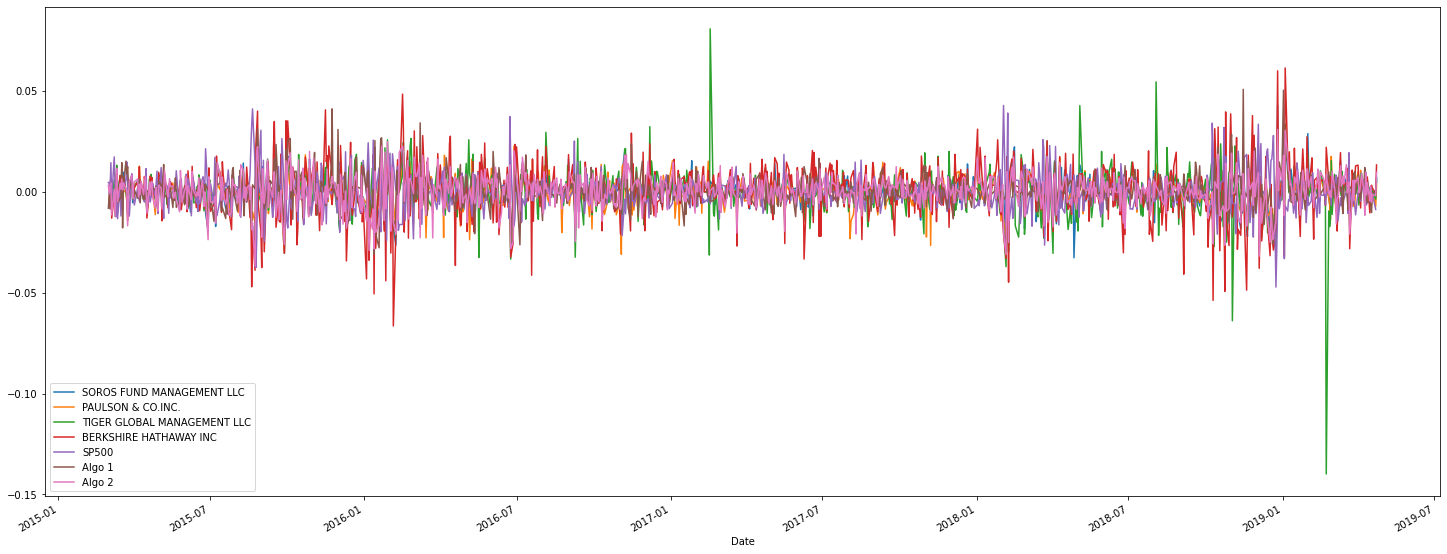

In [23]:
# Plot daily returns of all portfolios
Portfolio_df.plot(figsize=(25,10))

<AxesSubplot:xlabel='Date'>

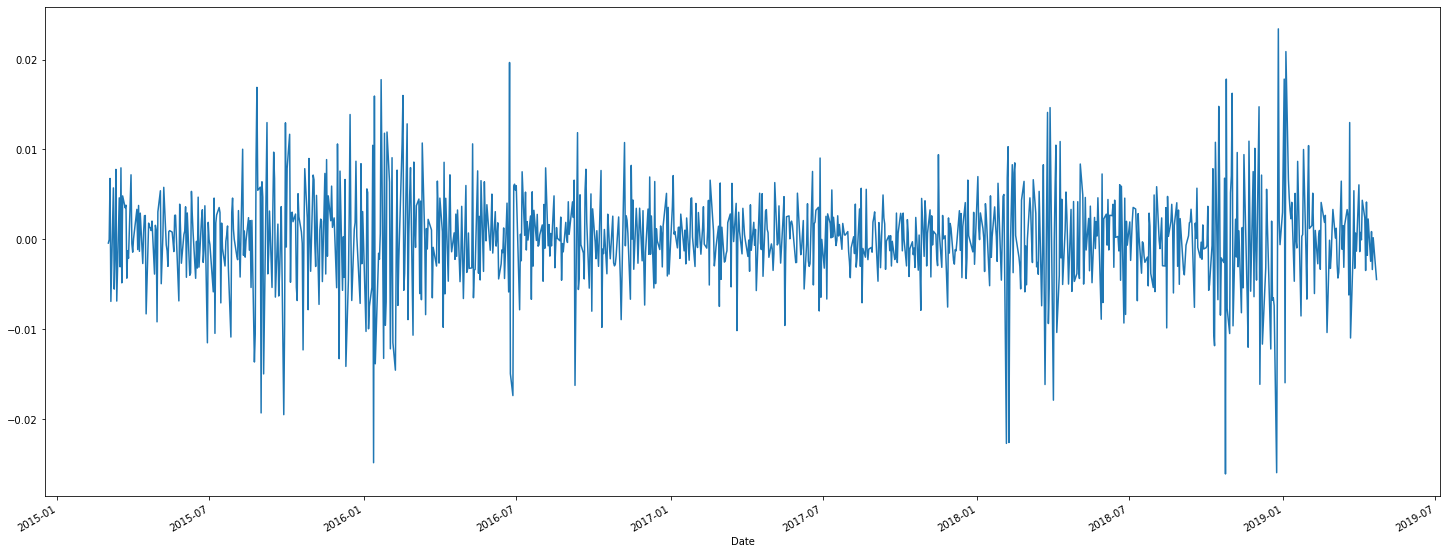

In [24]:
# Calculate cumulative returns of all (total) portfolio

weights = [0.2, 0.1, 0.1, 0.1, 0.3, 0.1, 0.1]

Portfolio_df_rt = Portfolio_df.dot(weights)
Portfolio_df_rt.head()

# Plot cumulative returns
Portfolio_df_rt.plot(figsize=(25,10))


<AxesSubplot:xlabel='Date'>

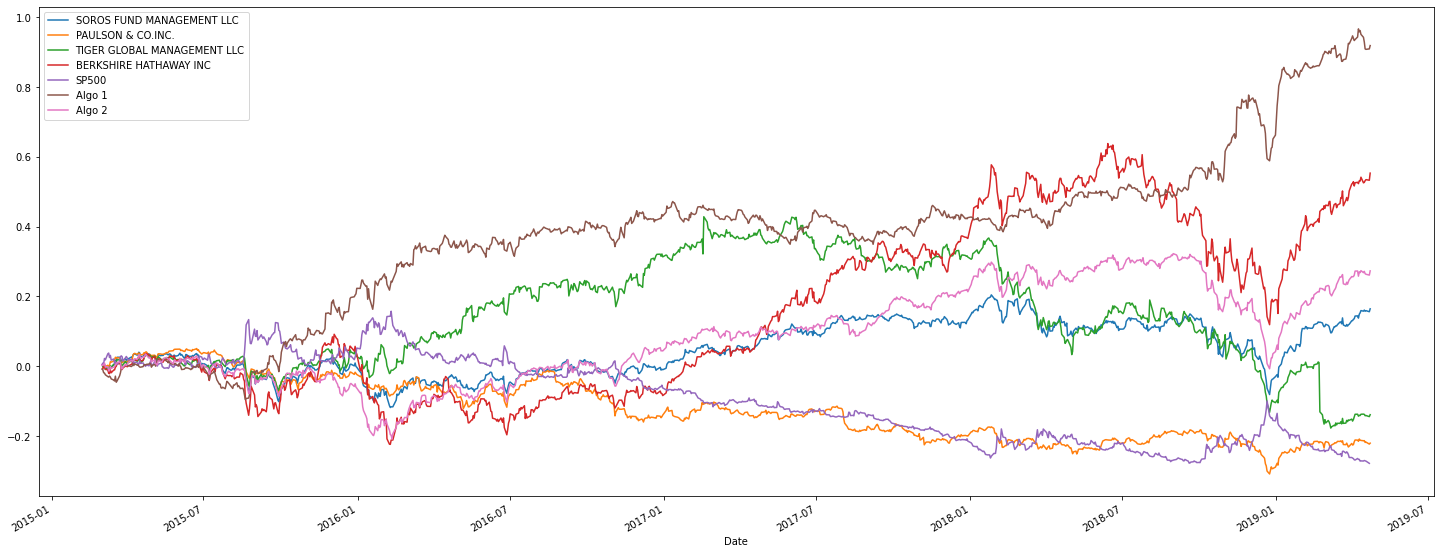

In [25]:
# Calculate cumulative returns of all portfolios


Portfolio_df_cum = (1+ Portfolio_df).cumprod(0) -1
Portfolio_df_cum.head()

# Plot cumulative returns
Portfolio_df_cum.plot(figsize=(25,10))

#Question: Does any portfolio outperform the S&P 500?, Answer: In long term all portfolios aoutperformed SP500


Risk Analysis
Determine the risk of each portfolio:

Create a box plot for each portfolio.
Calculate the standard deviation for all portfolios
Determine which portfolios are riskier than the S&P 500
Calculate the Annualized Standard Deviation

<AxesSubplot:>

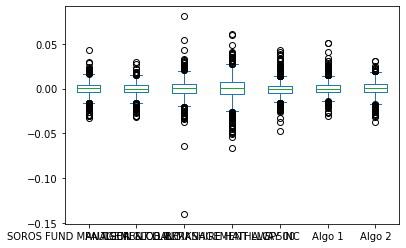

In [26]:
# Box plot to visually show risk
Portfolio_df.plot.box()

In [27]:
# Calculate the daily standard deviations of all portfolios (homework instructions asks for each portfolio)

daily_std = Portfolio_df.std().sort_values(ascending = False)

daily_std.head()


BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
SP500                          0.008584
Algo 2                         0.008339
SOROS FUND MANAGEMENT LLC      0.007895
dtype: float64

#Determine which portfolios are riskier than the S&P 500




# Calculate  the daily standard deviation of S&P 500
# done in above cell 144

# Determine which portfolios are riskier than the S&P 500
#Answer: Berkshire and Tiger Global are riskier vs. SP500

#Calculate the Annualized Standard Deviation


In [36]:
annualised_std = daily_std*np.sqrt(252)
annualised_std.head()

BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
SP500                          0.136268
Algo 2                         0.132374
SOROS FUND MANAGEMENT LLC      0.125335
dtype: float64

##Rolling Statistics
Risk changes over time. Analyze the rolling statistics for Risk and Beta.

Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

Calculate and plot rolling std for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

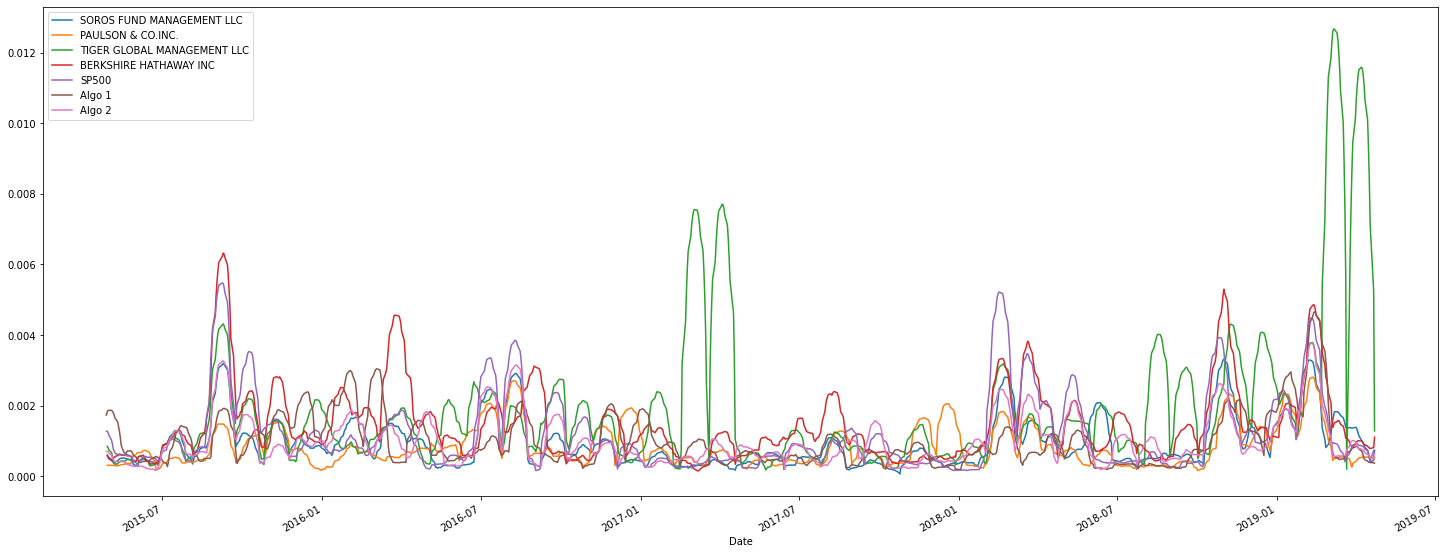

In [28]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

roll_daily_std = Portfolio_df.rolling(window = 21).std()

# Plot the rolling standard deviation
roll_daily_std.rolling(window = 21).std().plot(figsize = (25,10))

#Calculate and plot the correlation¶

<AxesSubplot:>

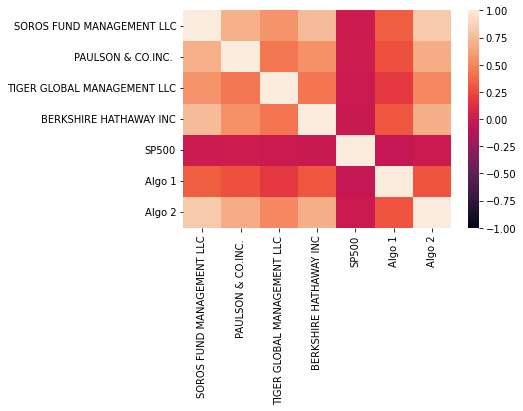

In [29]:
# Calculate the correlation

Portfolio_corel = Portfolio_df.corr()

# Display de correlation matrix

sns.heatmap(Portfolio_corel, vmin=-1, vmax=1)

##Calculate and Plot Beta for a chosen portfolio and the S&P 500¶


In [30]:
# Calculate covariance of a single portfolio

covariance = algo_df['Algo 1'].rolling(window=60).cov(SP500_df['SP500'])
covariance

Date
2012-10-01   NaN
2012-10-02   NaN
2012-10-03   NaN
2012-10-04   NaN
2012-10-05   NaN
              ..
2019-04-25   NaN
2019-04-26   NaN
2019-04-29   NaN
2019-04-30   NaN
2019-05-01   NaN
Length: 1655, dtype: float64

In [31]:
# Calculate variance of S&P 500
variance = algo_df['Algo 1'].rolling(window=60).var()
variance

Date
2014-05-28         NaN
2014-05-29         NaN
2014-05-30         NaN
2014-06-02         NaN
2014-06-03         NaN
                ...   
2019-04-25    0.000023
2019-04-26    0.000023
2019-04-29    0.000023
2019-04-30    0.000023
2019-05-01    0.000022
Name: Algo 1, Length: 1241, dtype: float64

In [56]:
# Computing beta

rolling_beta_new = covariance / variance


<AxesSubplot:title={'center':'Rolling 60 Day Beta of Algo 1 and SP500'}, xlabel='Date'>

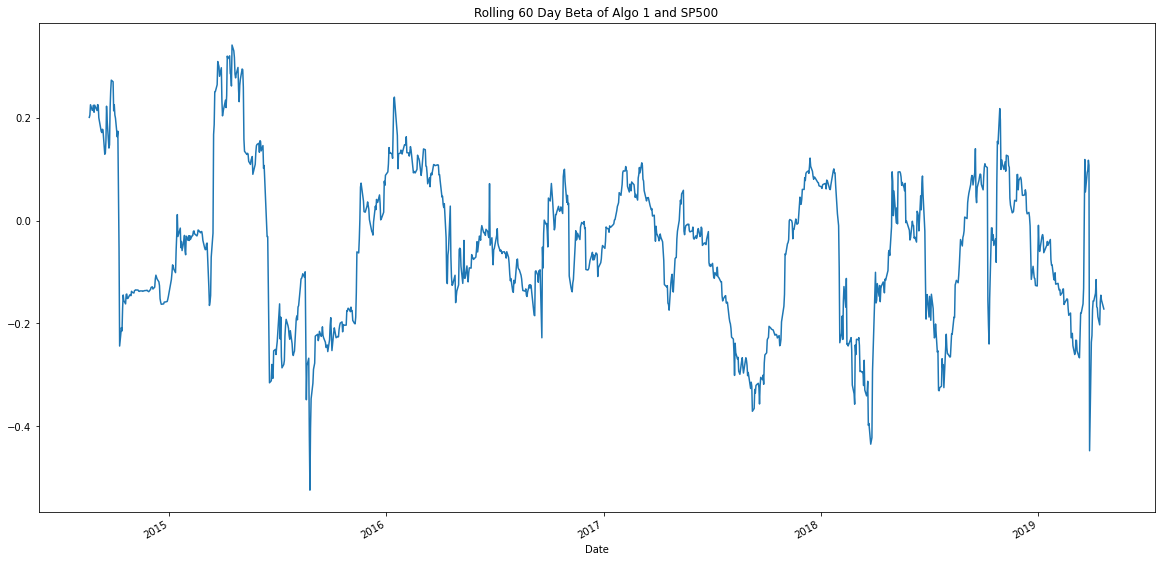

In [57]:
# Plot beta trend 60 D trend

rolling_beta_new.plot(figsize=(20,10), title='Rolling 60 Day Beta of Algo 1 and SP500')



In [35]:
#Rolling Statistics Challenge: Exponentially Weighted Average

#An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21-day half life for each portfolio, using standard deviation (std) as the metric of interest.


algo_df['Algo 1'].ewm(com=0.3).mean()

Date
2014-05-28    0.001745
2014-05-29    0.003559
2014-05-30    0.004264
2014-06-02    0.005366
2014-06-03    0.005309
                ...   
2019-04-25    0.000922
2019-04-26    0.002506
2019-04-29    0.004584
2019-04-30   -0.001207
2019-05-01   -0.000206
Name: Algo 1, Length: 1241, dtype: float64

#Sharpe Ratios

In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot¶

In [36]:
# Annualized Sharpe Ratios
sharpe_ratios = Portfolio_df.mean()*252 / (daily_std*np.sqrt(252))
sharpe_ratios.head()

#least risky stock is Algo 1 with highest Sharpe Ratio , which has low ST dev with high returns in the numerator. 

Algo 1                       1.360829
Algo 2                       0.506929
BERKSHIRE HATHAWAY INC       0.621810
PAULSON & CO.INC.           -0.483570
SOROS FUND MANAGEMENT LLC    0.356417
dtype: float64

Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.
Write your answer here!

Answer: yes: Algorythmis strategies Algo 1 outperformerd SP 500 as Sharpe ratio is the highest vs. other and SP500. The ratio suggests that stock has low st dev (volatility risk) and relatively high returns resulting in high Sharpe ratio of 130%. 

<AxesSubplot:title={'center':'Sharpe Ratios'}>

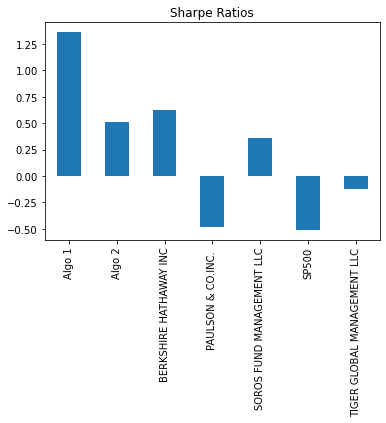

In [37]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(title="Sharpe Ratios")


Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500.

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

In [ ]:
#Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [38]:
# Reading data from 1st stock
COST_file = Path("Resources/cost_historical.csv")
COST_df = pd.read_csv(COST_file, index_col='Trade DATE',parse_dates=True, infer_datetime_format=True)
COST_df.head(20)


,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62
2019-05-02,COST,242.69
2019-05-01,COST,241.59
2019-04-30,COST,245.53
2019-04-29,COST,244.28


In [39]:
# Reading data from 2nd stock

AAPL_file = Path("Resources/aapl_historical.csv")
AAPL__df = pd.read_csv(AAPL_file, index_col='Trade DATE',parse_dates=True, infer_datetime_format=True)
AAPL__df.head(20)

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75
2019-05-02,AAPL,209.15
2019-05-01,AAPL,210.52
2019-04-30,AAPL,200.67
2019-04-29,AAPL,204.61


In [40]:
# Reading data from 3rd stock
GOOG_file = Path("Resources/goog_historical.csv")
GOOG__df = pd.read_csv(GOOG_file, index_col='Trade DATE',parse_dates=True, infer_datetime_format=True)
GOOG__df.head(20)

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40
2019-05-02,GOOG,1162.61
2019-05-01,GOOG,1168.08
2019-04-30,GOOG,1188.48
2019-04-29,GOOG,1287.58


In [41]:
# Combine all stocks in a single DataFrame

My_stock = pd.concat([COST_df, AAPL__df, GOOG__df], axis="columns", join="inner")
My_stock.head(20)


,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2019-05-09,COST,243.47,AAPL,200.72,GOOG,1162.38
2019-05-08,COST,241.34,AAPL,202.90,GOOG,1166.27
2019-05-07,COST,240.18,AAPL,202.86,GOOG,1174.10
2019-05-06,COST,244.23,AAPL,208.48,GOOG,1189.39
2019-05-03,COST,244.62,AAPL,211.75,GOOG,1185.40
2019-05-02,COST,242.69,AAPL,209.15,GOOG,1162.61
2019-05-01,COST,241.59,AAPL,210.52,GOOG,1168.08
2019-04-30,COST,245.53,AAPL,200.67,GOOG,1188.48
2019-04-29,COST,244.28,AAPL,204.61,GOOG,1287.58


In [42]:
My_stock.drop(columns =['Symbol'], inplace=True)

My_stock.head()

,NOCP,NOCP,NOCP
Trade DATE,,,
2019-05-09,243.47,200.72,1162.38
2019-05-08,241.34,202.90,1166.27
2019-05-07,240.18,202.86,1174.10
2019-05-06,244.23,208.48,1189.39
2019-05-03,244.62,211.75,1185.40


In [43]:
columns=['COST', 'AAPL', 'GOOG']
My_stock.columns=columns
My_stock.head(20)
My_stock.tail(20)

,COST,AAPL,GOOG
Trade DATE,,,
2018-06-08,203.76,191.70,1120.87
2018-06-07,202.57,193.46,1123.86
2018-06-06,197.66,193.98,1136.88
2018-06-05,197.84,193.31,1139.66
2018-06-04,198.62,191.83,1139.29
2018-06-01,197.13,190.24,1119.50
2018-05-31,198.24,186.87,1084.99
2018-05-30,199.64,187.50,1067.80
2018-05-29,196.74,187.90,1060.32


In [44]:
# Datafram for close prices only 
My_stock.dtypes


COST    float64
AAPL    float64
GOOG    float64
dtype: object

In [45]:
# Reset Date index

My_stock.index.names = ['Date']
My_stock                      


,COST,AAPL,GOOG
Date,,,
2019-05-09,243.47,200.72,1162.38
2019-05-08,241.34,202.90,1166.27
2019-05-07,240.18,202.86,1174.10
2019-05-06,244.23,208.48,1189.39
2019-05-03,244.62,211.75,1185.40
...,...,...,...
2018-05-17,199.60,186.99,1078.59
2018-05-16,198.71,188.18,1081.77
2018-05-15,195.48,186.44,1079.23


In [46]:
# Calculate daily returns

My_stock_rt_pc = My_stock.pct_change()
My_stock_rt_pc


# Drop NAs
My_stock_rt_pc.dropna(inplace=True)


# Display sample data
My_stock_rt_pc.head(20)

,COST,AAPL,GOOG
Date,,,
2019-05-08,-0.008749,0.010861,0.003347
2019-05-07,-0.004806,-0.000197,0.006714
2019-05-06,0.016862,0.027704,0.013023
2019-05-03,0.001597,0.015685,-0.003355
2019-05-02,-0.007890,-0.012279,-0.019226
2019-05-01,-0.004533,0.006550,0.004705
2019-04-30,0.016309,-0.046789,0.017465
2019-04-29,-0.005091,0.019634,0.083384
2019-04-26,-0.001883,-0.001515,-0.011960


Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [47]:
# Set weights

weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

Adjusted_ret = My_stock_rt_pc.dot(weights)
Adjusted_ret.head()

# Use the `cumprod` function to calculate cumulative returns
#cumulative = (1 + My_stock_rt_adj).cumprod()


# Plot the returns of the investment
#cumulative.plot()


Date
2019-05-08    0.001820
2019-05-07    0.000570
2019-05-06    0.019196
2019-05-03    0.004642
2019-05-02   -0.013131
dtype: float64

Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [48]:
# Join your returns DataFrame to the original returns DataFrame
Portfolio_Total = pd.concat([My_stock_rt_pc, Portfolio_df], axis="columns", join="inner")
Portfolio_Total.head(20)

,COST,AAPL,GOOG,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SP500,Algo 1,Algo 2
Date,,,,,,,,,,
2019-04-23,-0.009598,0.001545,0.006807,0.007167,0.003485,0.006472,0.013278,NaN,0.004969,0.009622
2019-04-22,-0.008796,-0.014218,-0.012423,-0.002586,-0.007333,-0.003640,-0.001088,-0.008764,0.000677,-0.001936
2019-04-18,0.009818,-0.003276,-0.009985,0.001448,0.001222,0.000582,0.001916,-0.001011,-0.000588,-0.001229
2019-04-17,-0.001017,-0.003581,-0.000024,-0.002897,-0.006467,-0.004409,0.003222,-0.001577,-0.010301,-0.005228
2019-04-16,-0.000896,-0.019101,-0.007449,0.002699,0.000388,-0.000831,0.000837,0.002279,-0.006945,0.002899
2019-04-15,0.004035,-0.000100,-0.004914,-0.001422,-0.001156,0.000398,-0.010492,-0.000509,-0.004331,-0.004572
2019-04-12,-0.017781,-0.001807,-0.002645,0.005663,-0.001165,0.004217,0.007316,0.000630,-0.005501,0.004504
2019-04-11,-0.002934,0.000402,-0.010880,0.003406,-0.003959,-0.000637,-0.000496,-0.006566,0.001705,-0.001568
2019-04-10,0.018115,0.008394,-0.002042,0.009808,0.008366,0.002912,0.005269,-0.000038,-0.004221,0.009632


In [49]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
Portfolio_Total.dropna().copy()

,COST,AAPL,GOOG,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SP500,Algo 1,Algo 2
Date,,,,,,,,,,
2019-04-22,-0.008796,-0.014218,-0.012423,-0.002586,-0.007333,-0.003640,-0.001088,-0.008764,0.000677,-0.001936
2019-04-18,0.009818,-0.003276,-0.009985,0.001448,0.001222,0.000582,0.001916,-0.001011,-0.000588,-0.001229
2019-04-17,-0.001017,-0.003581,-0.000024,-0.002897,-0.006467,-0.004409,0.003222,-0.001577,-0.010301,-0.005228
2019-04-16,-0.000896,-0.019101,-0.007449,0.002699,0.000388,-0.000831,0.000837,0.002279,-0.006945,0.002899
2019-04-15,0.004035,-0.000100,-0.004914,-0.001422,-0.001156,0.000398,-0.010492,-0.000509,-0.004331,-0.004572
...,...,...,...,...,...,...,...,...,...,...
2018-05-17,0.003217,0.003650,0.011469,-0.001955,0.002524,-0.006267,-0.005140,0.002639,-0.006949,0.005205
2018-05-16,-0.004459,0.006364,0.002948,0.008637,0.006244,0.005480,0.004310,0.000857,-0.002326,0.003341
2018-05-15,-0.016255,-0.009246,-0.002348,-0.000726,-0.001409,-0.003189,-0.014606,-0.004044,-0.001135,-0.001139


Re-run the risk analysis with your portfolio to see how it compares to the others¶
Calculate the Annualized Standard Deviation¶

In [50]:
# Calculate the annualized `std`
Portfolio_Total.std()

COST                           0.013601
AAPL                           0.018914
GOOG                           0.016059
SOROS FUND MANAGEMENT LLC      0.009226
PAULSON & CO.INC.              0.007338
TIGER GLOBAL MANAGEMENT LLC    0.014619
BERKSHIRE HATHAWAY INC         0.015539
SP500                          0.009584
Algo 1                         0.008405
Algo 2                         0.008773
dtype: float64

Calculate and plot rolling std with 21-day window¶

<AxesSubplot:xlabel='Date'>

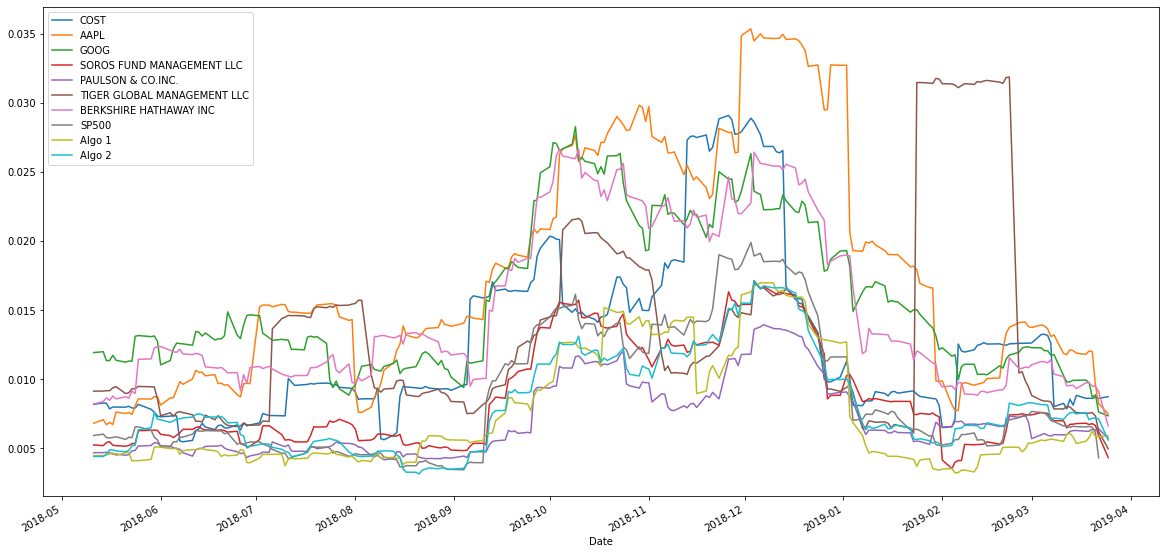

In [51]:
# Calculate rolling standard deviation

Portfolio_Total.rolling(window = 21).std().plot(figsize=(20,10))
# Plot rolling standard deviation


Calculate and plot the correlation

In [52]:
# Calculate and plot the correlation
#Portfolio_corr = Portfolio_Total.corr()
#sns.heatmap(Portfolio_corr, vmin=-1, vmax=1)
Portfolio_Total.head()


,COST,AAPL,GOOG,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SP500,Algo 1,Algo 2
Date,,,,,,,,,,
2019-04-23,-0.009598,0.001545,0.006807,0.007167,0.003485,0.006472,0.013278,NaN,0.004969,0.009622
2019-04-22,-0.008796,-0.014218,-0.012423,-0.002586,-0.007333,-0.003640,-0.001088,-0.008764,0.000677,-0.001936
2019-04-18,0.009818,-0.003276,-0.009985,0.001448,0.001222,0.000582,0.001916,-0.001011,-0.000588,-0.001229
2019-04-17,-0.001017,-0.003581,-0.000024,-0.002897,-0.006467,-0.004409,0.003222,-0.001577,-0.010301,-0.005228
2019-04-16,-0.000896,-0.019101,-0.007449,0.002699,0.000388,-0.000831,0.000837,0.002279,-0.006945,0.002899


Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [53]:
# Calculate covariance 

covariance_new = Portfolio_Total['GOOG'].cov(Portfolio_Total['SP500'])
covariance_new

# Calculate variance  

variance_new = Portfolio_Total["SP500"].var()
variance_new

# Calculate and plot Beta

                             
                             
# Portfolio_Total

9.185941770085176e-05

Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot¶

In [54]:
# Calculate Annualized Sharpe Ratios

# Annualized Sharpe Ratios
sharpe_ratios_new = My_stock_rt_pc.mean()*252 / (My_stock_rt_pc.std()*np.sqrt(252))
sharpe_ratios_new.head()



COST   -0.929405
AAPL   -0.061751
GOOG   -0.084987
dtype: float64

#Visualize the sharpe ratios as a bar plot

<AxesSubplot:>

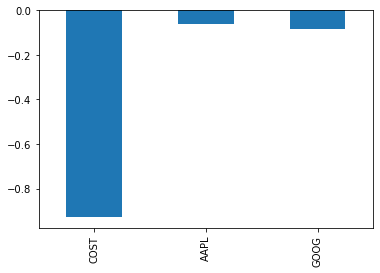

In [58]:
sharpe_ratios_new.plot(kind='bar')

How does your portfolio do?

Answer: my protfolio was less successful vs. Algo or Whale protfolios: Soros and Bershiere. 